In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import time

## Correlation

#### Correlation is one of the most fundamental and important analysis methods in statistics and machine learning. A correlation coefficient is a single number that quantifies the  linear  relationship  between  two  variables.  Correlation  coefficients  range  from −1 to +1, with −1 indicating a perfect negative relationship, +1 a perfect positive relationships, and 0 indicating no linear relationship.

#### Since the  dot  product  is  involved  in  the  correlation  coefficient,  and  that the  magnitude  of  the  dot  product  is  related  to  the  magnitude  of  the numerical  values  in  the  data, therefore the  correlation  coefficient  requires  some normalizations to be in the expected range of −1 to +1. Those two normalizations are:

1. ### <u><i>Mean center each variable</i></u> :- Mean centering means to subtract the average value from each data value.
2. ### <u><i>Divide the dot product by the product of the vector norms</i></u>:- This  divisive  normalization  cancels  the  measurement  units  and  scales  the  maximum possible correlation magnitude to |1|.

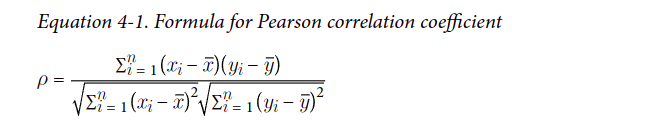

<b><u>Equation 4.2</b></u> shows  this  same  formula  rewritten  using  the  linear  algebra  dot-product  notation. In this equation, <h4>$\tilde{x}$</h4> is the mean-centered version of <b>x</b> (that is, variable <b>x</b> with normalization #1 applied).
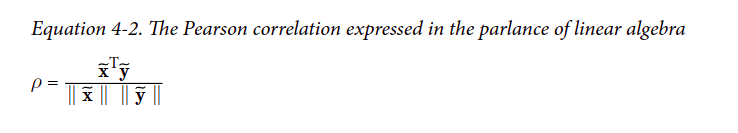

Thus Pearson  correlation  coefficient  is simply  the  dot  product  between  two  variables,  normalized  by  the  magnitudes  of  the variables. (By the way, you can also see from this formula that if the variables are unit normed such that ∥x∥=∥y∥= 1, then their correlation equals their dot product.
<h4>$\|x\| = \sqrt{x^T x}$</h4>

## Cosine Similarity
Correlation  is  not  the  only  way  to  assess  similarity  between  two  variables.  Another method  is  called  <b><u>cosine  similarity</b></u>.  The  formula  for  cosine  similarity  is  simply  the geometric formula for the dot product, solved for the cosine term:
###  $\cos(\theta_{\mathbf{x}, \mathbf{y}}) = \frac{\alpha}{\|\mathbf{x}\| \|\mathbf{y}\|}$

### $\alpha$ is dot product between x and y


## Correlation Versus Cosine Similarity
What  does  it  mean  for  two  variables  to  be  “related”?  Pearson  correlation  and  cosine similarity can give different results for the same data because they start from different assumptions. In the eyes of Pearson, the variables [0, 1, 2, 3] and [100, 101, 102, 103]are  perfectly  correlated  (ρ= 1)  because  changes  in  one  variable  are  exactly  mirrored in  the  other  variable;  it  doesn’t  matter  that  one  variable  has  larger  numerical  values.However,  the  cosine  similarity  between  those  variables  is  .808 — they  are  not  in  the same  numerical  scale  and  are  therefore  not  perfectly  related.  Neither  measure  is incorrect nor better than the other; it is simply the case that different statistical methods make different assumptions about data, and those assumptions have implications for the results and for proper interpretation.

#### It  may  seem  like  correlation  and  cosine  similarity  are  exactly  the  same  formula. However, Equation  4-1  is  the  full  formula,  whereas  Equation  4-2  is a  simplification  under  the  assumption  that  the  variables  have  already  been  mean centered. Thus, cosine similarity does not involve the first normalization factor.

## Time Series Filtering & Feature Detection
The dot product is also used in time series filtering. Filtering is essentially a feature-detection method, whereby a template called a <i>kernel</i> in the parlance of filtering—is matched against portions of a time series signal, and the result of filtering is another time series that indicates how much the characteristics of the signal match the characteristics  of  the  kernel.  Kernels  are  carefully constructed  to  optimize  certain  criteria,such as smooth fluctuations, sharp edges, particular waveform shapes, and so on.
Kernel is a 2 parameter function that is represented as a matrix. It is used to perform operations such as convolution, filtering, and edge detection.
The  mechanism  of  filtering  is  to  compute  the  dot  product  between  the  kernel  and the  time  series  signal.  But  filtering  usually  requires  local  feature  detection,  and  the kernel  is  typically  much  shorter  than  the  entire  time  series.  Therefore,  we  compute the  dot  product  between  the  kernel  and  a  short  snippet  of  the  data  of  the  same length  as  the  kernel.  This  procedure  produces  one  time  point  in  the  filtered  signal(Figure 4-2), and then the kernel is moved one time step to the right to compute the dot product with a different (overlapping) signal segment. Formally, this procedure is called  convolution  and  involves  a  few  additional  steps.

## K-Means Clustering
k-means  clustering  is  an  unsupervised  method  of  classifying  multivariate  data  into  a relatively small number of groups, or categories, based on minimizing distance to the group center.

The brief description of the algorithm:

1. Initialize k centroids as random points in the data space. Each centroid is a class, or category, and the next steps will assign each data observation to each class. (A centroid is a center generalized to any number of dimensions.)
2. Compute   the   Euclidean   distance   between   each   data   observation   and   each centroid.
3. Assign each data observation to the group with the closest centroid.
4. Update  each  centroid  as  the  average  of  all  data  observations  assigned  to  that centroid.
5. Repeat steps 2–4 until a convergence criteria is satisfied, or for N iterations.

## Excercises

### Question 4-1. Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call np.corrcoef and spatial.distance.cosine. Check that the two output values are identical when the variables  are  already  mean  centered  and  different  when  the  variables  are  not  mean centered.

In [6]:
def correlation_and_cosine(vector1, vector2):
    dot_product = np.dot(vector1,vector2)
    norm_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
    cosine_similarity = dot_product / norm_product
    x_mean_centered = vector1 - np.mean(vector1)
    y_mean_centered = vector2 - np.mean(vector2)
    numerator = np.dot(x_mean_centered,y_mean_centered)
    denominator = np.linalg.norm(x_mean_centered) * np.linalg.norm(y_mean_centered)
    pearson_correlation_with_mean_centering = numerator/denominator
    return cosine_similarity, pearson_correlation_with_mean_centering

v1 = np.random.randn(15)
v2 = np.random.randn(15)

# compute the correlation and cosine
cosine_similarity,pearson_correlation_with_mean_centering = correlation_and_cosine(v1,v2)

print(cosine_similarity,pearson_correlation_with_mean_centering)

print(np.corrcoef(v1,v2)[0,1])

0.030497027119948488 0.015005554469798075
0.01500555446979808


In [7]:
v2 = np.random.randn(15)
v1 = np.random.randn(15)

# mean-center
v1NoMean = v1 - np.mean(v1)
v2NoMean = v2 - np.mean(v2)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(correlation_and_cosine(v1,v2))

print('With mean-centering (should be the same):')
print(correlation_and_cosine(v1NoMean,v2NoMean))

Without mean-centering (should differ):
(-0.020004807300688522, -0.10113724863589992)
With mean-centering (should be the same):
(-0.10113724863589992, -0.10113724863589992)


### Question 4.2:-  Let’s  continue  exploring  the  difference  between  correlation  and  cosine  similarity.Create a variable containing the integers 0 through 3, and a second variable equaling the  first  variable  plus  some  offset.  You  will  then  create  a  simulation  in  which  you systematically  vary  that  offset  between  −50  and  +50  (that  is,  the  first  iteration  of  the simulation  will  have  the  second  variable  equal  to  [−50,  −49,  −48,  −47]).  In  a  for loop,  compute  the  correlation  and  cosine  similarity  between  the  two  variables  andstore  these  results.  Then  make  a  line  plot  showing  how  the  correlation  and  cosine similarity are affected by the mean offset. You should be able to reproduce Figure 4-4
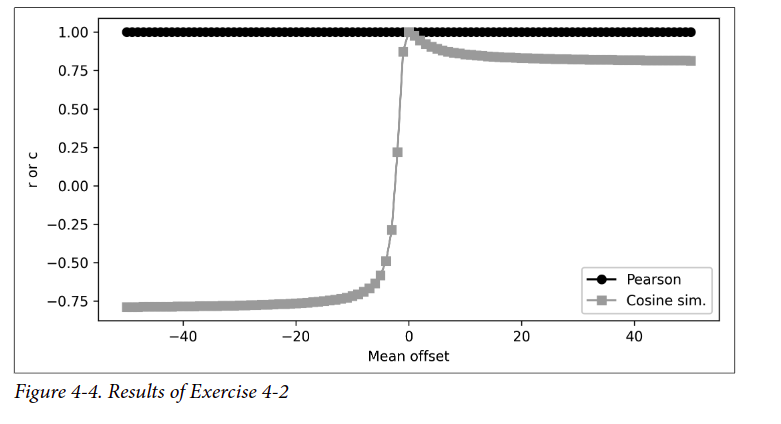


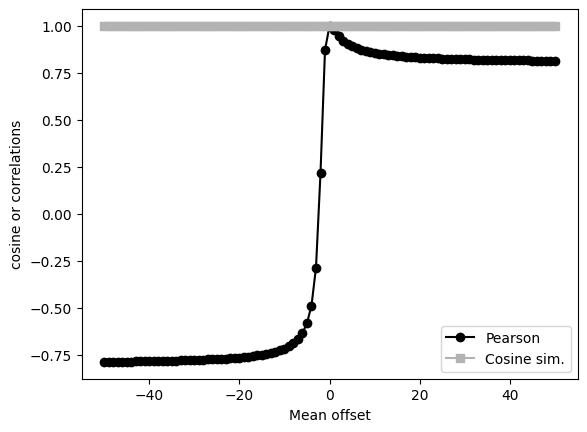

In [10]:
v1 = np.arange(4, dtype=int)
offset = np.arange(-50,51)
results = np.zeros((len(offset),2))
for i in range(len(offset)):
    results[i,:] = correlation_and_cosine(v1, v1+offset[i])

# plot the results!
plt.figure()
ax = plt.plot(offset,results)
ax[0].set_color('k')
ax[0].set_marker('o')
ax[1].set_color([.7,.7,.7])
ax[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('cosine or correlations')
plt.legend(['Pearson','Cosine sim.'])
plt.show()

### Question 4-3.There  are  several  Python  functions  to  compute  the  Pearson  correlation  coefficient.One  of  them  is  called  pearsonr  and  is  located  in  the  stats  module  of  the  SciPylibrary. Open the source code for this file (hint: ??functionname) and make sure you understand  how  the  Python  implementation  maps  onto  the  formulas  introduced  in this chapter.

In [12]:
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided')
Source:   
def pearsonr(x, y, *, alternative='two-sided'):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing da

### Question 4-4.Why do you ever need to  code your own functions when they already exist in  Python?Part  of    the  reason  is   that  writing  your  own  functions  has  huge  educational  value,because you see that (in this case) the correlation is a simple computation and not some incredibly  sophisticated  black-box  algorithm  that  only  a  computer-science  PhD  couldunderstand. But another reason is that built-in functions are sometimes slower because of    myriad  input  checks,  dealing  with  additional  input  options,  converting  data  types,etc. This increases usability but at the expense of computation time.Your  goal  in  this  exercise  is  to  determine  whether  your  own  bare-bones  correlation  function  is  faster  than  NumPy’s  corrcoef  function.  Modify  the  function  from Question  4-2  to  compute  only  the  correlation  coefficient.  Then,  in  a  for  loop  over 1,000  iterations,  generate  two  variables  of  500  random  numbers  and  compute  the correlation  between  them.  Time  the  for  loop.  Then  repeat  but  using  np.corrcoef.In  my  tests,  the  custom  function  was  about  33%  faster  than  np.corrcoef.  In  thesetoy  examples,  the  differences  are  measured  in  milliseconds,  but  if  you  are  runningbillions  of  correlations  with  large  datasets,  those  milliseconds  really  add  up!  (Notethat writing your own functions without input checks has the risk of input errors thatwould be caught by np.corrcoef.) (Also note that the speed advantage breaks downfor larger vectors. Try it!)

In [14]:
def only_correlation(vector1, vector2):
    x_mean_centered = vector1 - np.mean(vector1)
    y_mean_centered = vector2 - np.mean(vector2)
    numerator = np.dot(x_mean_centered,y_mean_centered)
    denominator = np.linalg.norm(x_mean_centered) * np.linalg.norm(y_mean_centered)
    return numerator/denominator
total_iterations = 1000
random_variable_length = 500
start = time.time()
for i in range(total_iterations):
  x = np.random.randn(random_variable_length,2)
  only_correlation(x[:,0],x[:,1])
end1 = time.time() - start
start = time.time()
for i in range(total_iterations):
  x = np.random.randn(random_variable_length,2)
  pearsonr(x[:,0],x[:,1])
end2 = time.time() - start
print(end1)
print(end2)

0.07209277153015137
0.8068311214447021


### Question 4-5. Let’s  build  an  edge  detector.  The  kernel  for  an  edge  detector  is  very  simple:  [−1  +1]. The  dot  product  of  that  kernel  with  a  snippet  of  a  time  series  signal  with  a constant value  (e.g.,  [10  10])  is  0.  But  that  dot  product  is  large  when  the  signal  has  a  steep change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The first step in this exercise is to write code that creates these two-time series.
### Next, write a for loop over the time points in the signal. At each time point, compute the  dot  product  between  the  kernel  and  a  segment  of  the  time  series  data  that  has the  same  length  as  the  kernel.  You  should  produce  a  plot  that  looks  like  graph  C  in Figures  4-5.  (Focus  more  on  the  result  than  on  the  aesthetics.)  Notice  that  our  edge-detector  returned  0  when  the  signal  was  flat,  +1  when  the  signal  jumped  up,  and  −1 when the signal jumped down. Feel  free  to  continue  exploring  this  code.  For  example,  does  anything  change  if  you pad the kernel with zeros ([0 −1 1 0])? What about if you flip the kernel to be [1 −1]?How about if the kernel is asymmetric ([−1 2])?
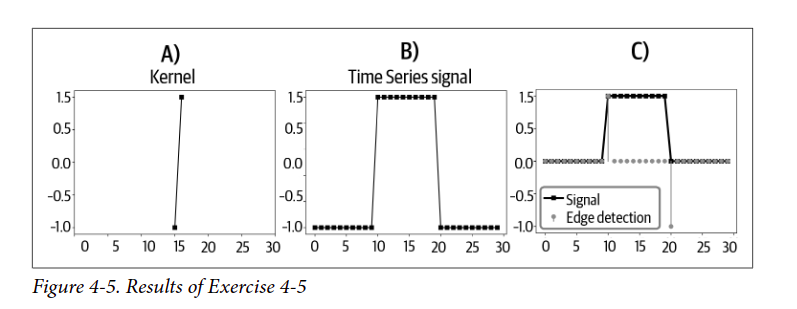

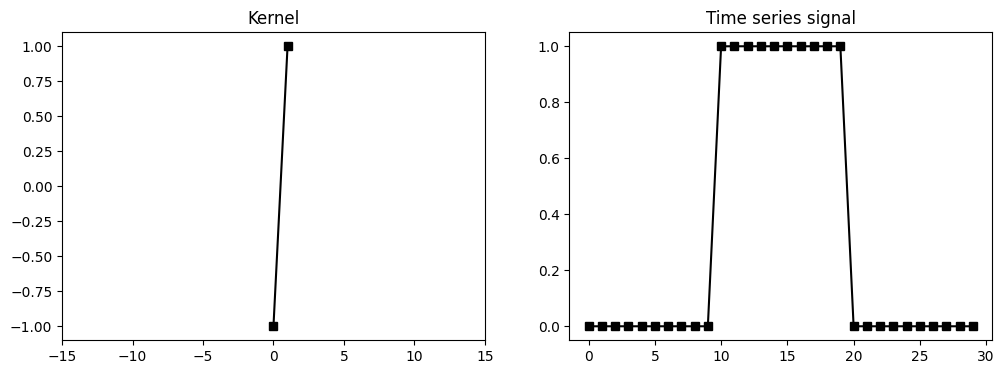

In [15]:
#kernel
kernel = np.array([-1,1])
#signal
signal = np.zeros(30)
signal[10:20] = 1
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.show()

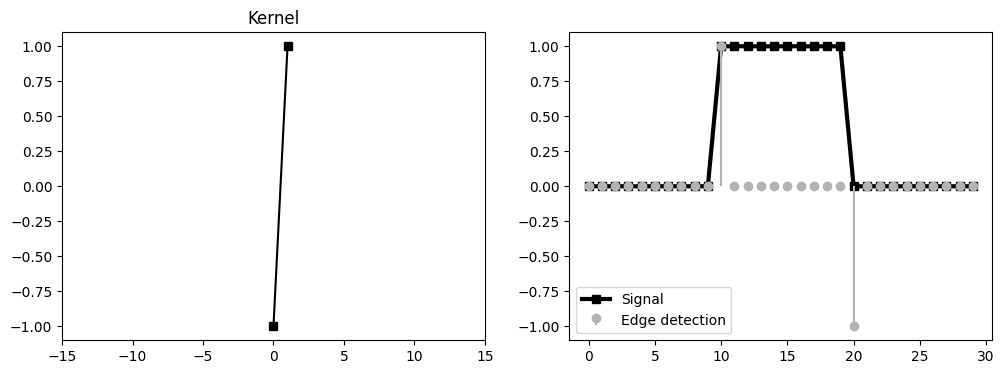

In [16]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

for t in range(1,len(signal)-1):
  featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()

plt.show()

### Question 4-6.Now  we  will  repeat  the  same  procedure  but  with  a  different  signal  and  kernel.  The goal  will  be  to  smooth  a  rugged  time  series.  The  time  series  will  be  100  random numbers  generated  from  a  Gaussian  distribution  (also  called  a  normal  distribution).The  kernel  will  be  a  bell-shaped  function  that  approximates  a  Gaussian  function,defined  as  the  numbers  [0,  .1,  .3,  .8,  1,  .8,  .3,  .1,  0]  but  scaled  so  that  the  sum  over the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signalwon’t look exactly like graph B due to random numbers.Copy and adapt the code from the previous exercise to compute the sliding time series  of  dot  products—the  signal  filtered  by  the  Gaussian  kernel.  Warning:  be  mindful of the indexing in the for loop. Graph C in Figure 4-6 shows an example result. You can see that the filtered signal is a smoothed version of the original signal. This is alsocalled low-pass filtering.
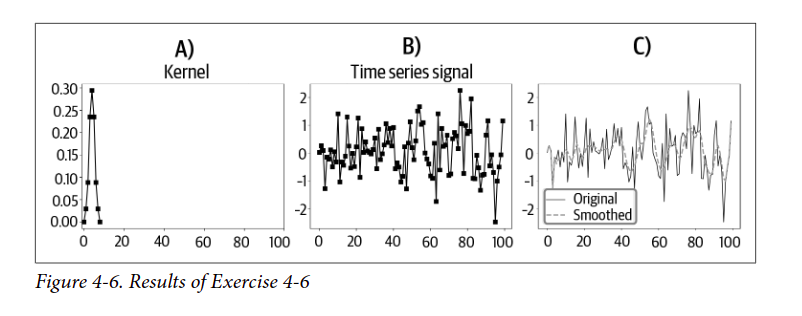

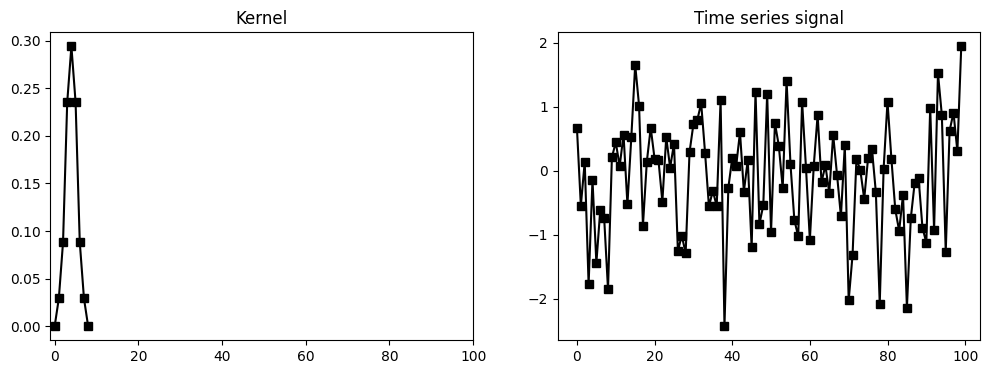

In [21]:
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)
kernel_len = len(kernel)
kernel_len_half = kernel_len//2
signal_len = 100
timeseries = np.random.randn(signal_len)
# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,signal_len])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.show()

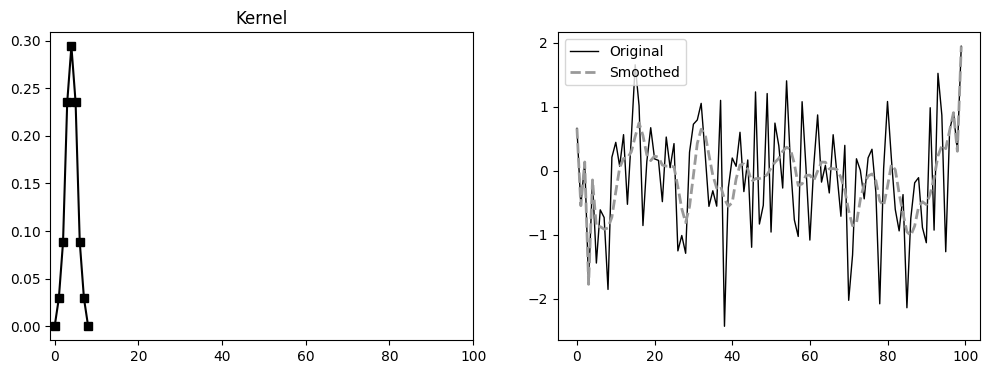

In [22]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(kernel_len_half+1,signal_len-kernel_len_half):
  filtsig[t] = np.dot(kernel,timeseries[t-kernel_len_half-1:t+kernel_len_half])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,signal_len])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.show()

### Question 4-8.One  way  to  determine  an  optimal  k  is  to  repeat  the  clustering  multiple  times  (each time  using  randomly  initialized  cluster  centroids)  and  assess  whether  the  final  clustering is the same or different. Without generating new data, rerun the k-means codeseveral  times  using  k  =  3  to  see  whether  the  resulting  clusters  are  similar  (this  is  aqualitative  assessment  based  on  visual  inspection).  Do  the  final  cluster  assignments generally seem similar even though the centroids are randomly selected?

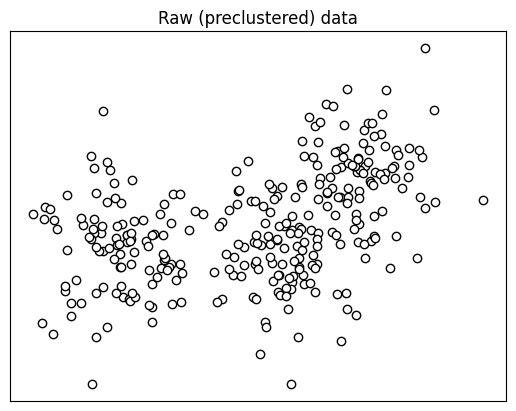

In [23]:
## Create data
nPerClust = 100

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

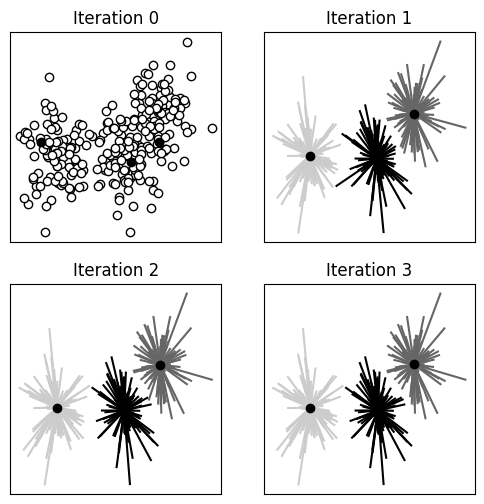

In [24]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])



plt.show()


### Question Repeat  the  multiple  clusterings  using  k  =  2  and  k  =  4.  What  do  you  think  of  these results?

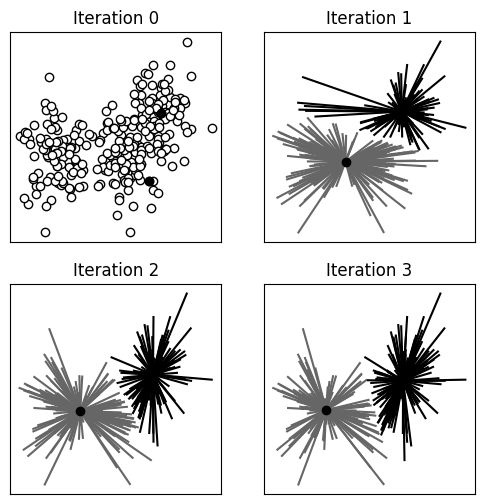

In [25]:
## initialize random cluster centroids
k = 2 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])



plt.show()


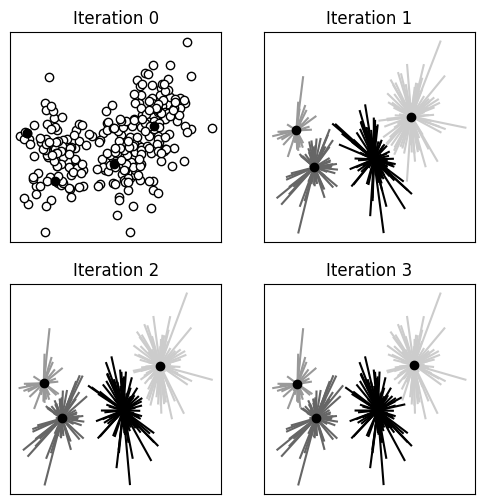

In [27]:
## initialize random cluster centroids
k = 4 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4], [.6,.6,.6],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])



plt.show()
